# **Model Tuning**

# Mô hình: Gradient Boosting Machine 


Phần giới thiệu về mô hình này là do nhóm tự tìm hiểu và giải thích.

## Ensemble Methods

**Ensemble Methods** (Học kết hợp) là phương pháp giải quyết bài toán bằng cách xây dựng nhiều mô hình "yếu“ (weak learner), đơn giản và kết hợp chúng là với nhau để thu được một mô hình vượt trội, thay vì xây dựng một mô hình thật sự tốt ngay từ ban đầu.

![Ensemble Methods](https://github.com/huuthang2509/Applied_DS/blob/main/Image/ensemble-method.png?raw=true)

> Nguồn: https://www.educba.com/ensemble-methods-in-machine-learning/

## Boosting

Là một trong 3 nhóm của Ensemble Methods (bên cạnh Bagging và Stacking).

**Boosting** là một phương pháp xây dựng một loạt các mô hình giống nhau, trong đó các mô hình sau sẽ cố gắng học để hạn chế lỗi của mô hình trước. Mỗi mô hình có thể xem là một **base model** hay weak learner.

Có 2 loại Boosting là:
- Adaptive Boosting (AdaBoost)
- Gradient Boosting

## Gradient Boosting

**Gradient Boosting** là một phương pháp xây dựng một loạt các mô hình giống nhau, trong đó các mô hình sau sẽ cố gắng học để hạn chế lỗi của mô hình trước. Thuật toán dựa vào **Gradient Descent** và ở đây mỗi base model là thường một **cây quyết định**.

Có 2 framework phổ biến nhất là **XGBoost** và **LightGBM**.

![Simple Example Gradient Boosting](https://github.com/huuthang2509/Applied_DS/blob/main/Image/examble-gradient-boosting.png?raw=true)

### Lý do lựa chọn LightGBM

- Đây là một trong những thuật toán mạnh nhất hiện nay.
- Có thể xử lý vấn đề missing value, có feature important để loại bớt các thuộc tính không cần thiết.
- Nó có tốc độ xử lý nhanh hơn rất nhiều lần so với XGBoost. (Vì XGBoost chạy rất chậm với tập dữ liệu lớn).

LightGBM sử dụng phương pháp leaf - wise (Lựa chọn những node có giá trị tốt hơn thay vì duyệt qua tất cả các node):

![XGBoost vs LightGBM](https://github.com/huuthang2509/Applied_DS/blob/main/Image/LGBM.png?raw=true)

# Hyperparameter Tuning

Điều chỉnh siêu tham số (Hyperparameter Tuning) là quá trình điều chỉnh mô hình và tìm sự kết hợp của các giá trị siêu tham số cho một mô hình học máy để đạt được độ đo tốt nhất cho một vấn đề.

Có một số cách thường thấy của việc điều chỉnh siêu tham số:

1. __Thủ công__: lựa chọn siêu tham số dựa vào kinh nghiệm, suy đoán... và sau đó huấn luyện mô hình. Lặp lại các bước khi được kết quả phù hợp hoặc khi hết kiên nhẫn.
2. __Grid Search__: tạo một lưới các giá trị siêu tham số và huấn luyện mô hình, tính số điểm trên tập validation với mỗi sự kết hợp.
3. __Random search__: tạo một lưới các giá trị siêu tham số và lựa chọn ngẫu nhiên một số sự kết hợp để huấn luyện và tính điểm của mô hình. Số lần lặp lại dựa trên tài nguyên/thời gian.
4. __Automated Hyperparameter Tuning__: sử dụng các phương pháp như gradient descent, Bayesian Optiomization hoặc các thuật toán cải tiến để tìm kiếm các siêu tham số tốt nhất.

(Ta có thể xem chi tiết hơn [tại đây](https://en.wikipedia.org/wiki/Hyperparameter_optimization))

Tác giả của chuỗi Notebook sử dụng hướng tiếp cận 2, 3 và 4. Nhóm đã thực hiện lại và lựa chọn Automated Hyperparameter Tuning để áp dụng và cải tiến mô hình.
Chi tiết về cách thực thi của nhóm bằng những phương pháp trên:
- [Manual Model Tuning](https://colab.research.google.com/github/huuthang2509/Applied_DS/blob/main/individual_notebooks/Manual_Model_Tuning.ipynb)
- [Automated Model Tuning](https://colab.research.google.com/github/huuthang2509/Applied_DS/blob/main/individual_notebooks/Automated_Model_Tuning.ipynb)

# Automated Model Tuning

Phần giải thích thuật toán tự động hoá điều chỉnh siêu tham số này nhóm dịch lại của tác giả, lược bỏ bớt và sử dụng theo ngôn ngữ của nhóm.

Tác giả sử dụng phương pháp Bayesian Optimization và thư viện Hyperopt để điều chỉnh siêu tham số của GBM một cách tự động nhằm cải tiến mô hình máy học.

## Bayesian Optimization Primer

Vấn đề của grid và random search đó là chúng không phải phương pháp có sử dụng những kết quả cũ từ các giá trị khác nhau của những siêu tham số trong hàm mục tiêu. Tối ưu hóa Bayes là giới hạn các lệnh gọi đến hàm đánh giá bằng cách chọn các giá trị siêu tham số tiếp theo dựa trên các kết quả trước đó. Điều này cho phép thuật toán dành nhiều thời gian hơn để đánh giá các giá trị siêu tham số  và tốn ít thời gian hơn ở các vùng có điểm thấp của không gian siêu tham số. Ví dụ, hãy xem xét hình ảnh dưới đây:

![](https://github.com/huuthang2509/Applied_DS/blob/main/Image/random_forest_hypothetical.png?raw=true)

Như hình trên thì ta nên tập trung vào khu vực có độ lỗi thấp. Tối ưu hóa Bayes hoạt động bằng cách xây dựng một hàm thay thế (dưới dạng mô hình xác suất: mô hình chứa các giá trị có thể của biến và xác suất xảy ra của biến này) của hàm mục tiêu $P(\text{score} | \text{hyperparameters})$. Hàm thay thế tốn ít chi phí hơn nhiều để đánh giá so với hàm mục tiêu, vì vậy thuật toán chọn các giá trị tiếp theo để thử trong mục tiêu dựa trên việc tối đa hóa một tiêu chí trên hàm thay thế (thường là cải tiến được mong đợi).

Hàm thay thế dựa trên kết quả đánh giá trong quá khứ. Bayesian optimization dựa trên lý luận Bayes: hình thành một mô hình và sau đó cập nhật nó với nhiều thông tin hơn. Ý tưởng ở đây là khi dữ liệu đủ nhiều, hàm thay thế ngày càng gần hàm mục tiêu, và các siêu tham số tốt nhất cho hàm thay thế cũng sẽ tốt với hàm mục tiêu. Một số lựa chọn phổ biến là Gaussian Process, Random Forest Regression và Tree Parzen Estimator.

### 4 Phần của Bayesian Optimization

1. __Objective Function__: hàm mục tiêu, nhận về các siêu tham số và trả về độ đo cần giảm thiểu hoặc tối ưu hoá.
2. __Domain space__: miền giá trị của các siêu tham số để tính toán
3. __Optimization Algorithm__: phương pháp sử dụng hàm thay thế và lựa chọn giá trị tiếp theo cho mô hình
4. __Results__: độ đo và các cặp giá trị để thuật toán sử dụng cho việc xây dựng hàm thay thế

## Hyperopt

Hyperopt là một thư viện Python mã nguồn mở triển khai Bayesian Optimization bằng cách sử dụng thuật toán Tree Parzen Estimator để xây dựng hàm thay thế và chọn các giá trị siêu tham số tiếp theo để đánh giá trong hàm mục tiêu.
[Hyperopt Documentation](http://hyperopt.github.io/hyperopt/)


## Tập dữ liệu và hướng tiếp cận

Bởi vì dữ liệu của cuộc thi rất lớn (~300.000 mẫu), nếu thực hiện hết ngay từ đầu sẽ rất tốn thời gian và tài nguyên. Nhóm sẽ thực hiện trước trên tập giới hạn với 20000 dữ liệu train, 10000 dữ liệu test. (Tác giả thực hiện trên tập 10000 train, 6000 test; nhóm quyết định nâng dữ liệu lên để tránh hiện tượng overfitting). Sau khi áp dụng Bayesian hyperparameter optimization trên tập giới hạn này và có được giá trị của bộ siêu tham số tối ưu. Nhóm sẽ thực hiện tiếp trên tập dữ liệu đã được tiền xử lý từ phần trước.


## Cross Validation

Chia tập train thành các tập con nhỏ đến tiến hành huấn luyện và xác thực chéo lẫn nhau. Sử dụng KFold (KFold cross validation) với n_fold = 5. Tập train sẽ được chia làm 5 phần, sau đó tiến hành train 5 lần, với mỗi lần thì sẽ dùng 1 phần làm validation và 4 phần còn lại làm dữ liệu train. Kết quả đánh giá model sẽ là trung bình cộng của 5 lần train. Hiệu suất của mỗi bộ siêu tham số sẽ được tính bằng ROC AUC. 


### Early Stopping

Siêu tham số number of estimators (số lượng cây quyết định được đào tạo tuần tự) là một trong những siêu tham số quan trọng nhất trong GBM. Phương pháp early stopping sẽ dừng quá trình train khi lỗi không giảm trong một số lần lặp nhất định. Trong bài này, tác giả áp dụng early stopping với 100 lần lặp. 

Nếu ta cứ tiếp tục huấn luyện khi độ lỗi không giảm thì có thể sai số huấn luyện sẽ giảm nhưng sẽ dẫn đến việc overfitting do mô hình quá phụ thuộc vào dữ liệu train.

Nội dung các phần code là nhóm thực hiện lại theo tác giả và lược bớt những phần không cần thiết.

## Thực hiện

### Import thư viện

In [ ]:
# Thư viện để thực hiện các thao tác trên dữ liệu
import pandas as pd
import numpy as np

# Mô hình
import lightgbm as lgb

# Đánh giá mô hình
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import roc_auc_score

# Trực quan hoá
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.size'] = 18
%matplotlib inline

# Các hằng phục vụ cho việc lựa chọn tham số
N_FOLDS = 5
MAX_EVALS = 5

### Import Data

In [ ]:
# Nhập dữ liệu train
# Nhóm có thử thực hiện sử dụng dữ liệu train là dữ liệu do nhóm tiền xử lý hoặc tăng số lượng mẫu, tuy nhiên không thành công
# Chi tiết nhóm sẽ trình bày ở phần "Một số cải tiến nhưng không thành công"
features = pd.read_csv('../input/home-credit-default-risk/application_train.csv')

# Chọn ra 30000 mẫu
features = features.sample(n = 30000, random_state = 42)

# Chọn ra các thuộc tính là number để tăng tốc độ tìm kiếm
features = features.select_dtypes('number')

# Tách thuộc tính TARGET riêng khỏi tập train
labels = np.array(features['TARGET'].astype(np.int32)).reshape((-1, ))
features = features.drop(columns = ['TARGET', 'SK_ID_CURR'])

# Chia tập dữ liệu thành 20000 mẫu để train và 10000 mẫu để test
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 10000, random_state = 42)

print('Train shape: ', train_features.shape)
print('Test shape: ', test_features.shape)

train_features.head()

Train shape:  (20000, 104)
Test shape:  (10000, 104)


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
134179,0,112500.0,389844.0,21145.5,315000.0,0.006207,-15787,-4829,-4423.0,-4429,34.0,1,1,0,1,1,0,2.0,2,2,17,0,0,0,0,0,0,NaN,0.466948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2178.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
182680,0,81000.0,536917.5,16407.0,463500.0,0.007120,-23491,365243,-2651.0,-4794,NaN,1,0,0,1,0,0,1.0,2,2,10,0,0,0,0,0,0,NaN,0.703974,0.529890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-717.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
82783,0,180000.0,1078200.0,31522.5,900000.0,0.007330,-22237,-2029,-9018.0,-4236,NaN,1,1,1,1,1,0,2.0,2,2,12,0,0,0,0,0,0,NaN,0.558410,0.520898,0.1639,0.1095,0.9881,NaN,0.0328,0.16,0.1379,0.3750,NaN,0.3380,...,0.1379,0.3750,NaN,0.3439,0.1360,0.1807,NaN,0.0007,0.2096,4.0,0.0,4.0,0.0,-1019.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
99674,0,202500.0,700830.0,22738.5,585000.0,0.008625,-19094,-2620,-10083.0,-2611,NaN,1,1,0,1,0,0,2.0,2,2,14,0,0,0,0,0,0,NaN,0.411426,0.415347,0.0686,0.0393,0.9732,0.6056,0.0109,0.00,0.1379,0.1458,0.1667,0.0424,...,0.1379,0.1458,0.1667,0.0431,0.0462,0.0690,0.0,0.0205,0.0619,1.0,0.0,1.0,0.0,-1056.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
239415,0,202500.0,1350000.0,39604.5,1350000.0,0.026392,-12995,-3741,-2793.0,-2925,2.0,1,1,0,1,0,0,2.0,2,2,14,0,0,0,0,0,0,NaN,0.472951,0.481249,0.0711,NaN,0.9945,NaN,NaN,0.00,0.0690,0.2500,NaN,NaN,...,0.0690,0.2500,NaN,NaN,NaN,0.0548,NaN,0.0000,0.0387,0.0,0.0,0.0,0.0,-2248.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


### Baseline Model 


Ta tạo một baseline model với các siêu tham số mặc định và tính độ đo của nó.

In [ ]:
model = lgb.LGBMClassifier(random_state=50)

# Chia tập dữ liệu
train_set = lgb.Dataset(train_features, label = train_labels)
test_set = lgb.Dataset(test_features, label = test_labels)

# Chọn tham số mặc định
hyperparameters = model.get_params()

# Xoá bỏ tham số 'n_estimators' nếu có, vì ta sẽ sử dụng early stopping
del hyperparameters['n_estimators']

# Thực hiện n_folds cross validation với 100 lần lặp early stopping
cv_results = lgb.cv(hyperparameters, train_set, num_boost_round = 10000, nfold = N_FOLDS, metrics = 'auc', 
           early_stopping_rounds = 100, verbose_eval = False, seed = 42)

# Trích xuất độ đo cv cao nhất
best = cv_results['auc-mean'][-1]

# Độ lệch chuẩn của best score
best_std = cv_results['auc-stdv'][-1]

print('The maximium ROC AUC in cross validation was {:.5f} with std of {:.5f}.'.format(best, best_std))
print('The ideal number of iterations was {}.'.format(len(cv_results['auc-mean'])))

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:661: UserWarning: silent keyword has been found in `params` and will be ignored. Please use silent argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))


The maximium ROC AUC in cross validation was 0.73014 with std of 0.01265.
The ideal number of iterations was 35.


Đánh giá độ đo ROC AUC trước khi điều chỉnh siêu tham số.

In [ ]:
# Tối ưu hoá số lượng vòng lặp thực thi
model.n_estimators = len(cv_results['auc-mean'])

# Huấn luyện và dự đoán kết quả
model.fit(train_features, train_labels)
preds = model.predict_proba(test_features)[:, 1]
baseline_auc = roc_auc_score(test_labels, preds)

print('The baseline model scores {:.5f} ROC AUC on the test set.'.format(baseline_auc))

The baseline model scores 0.73022 ROC AUC on the test set.


## Objective Function

Hàm tối ưu hoá thường trả về việc giảm thiếu các giá trị, còn ROC AUC tốt khi đạt giá trị cao. Cho nên hàm mục tiêu sẽ trả về $1 - \text{ROC AUC Cross Validation}$. Kết quả trả về thấp, đồng nghĩa với ROC AUC cao.

Hàm sau khi thực thi sẽ lưu các giá trị vào file csv để theo dõi kết quả

In [ ]:
import csv
# Kiểm tra trạng thái và thời gian thực thi
from hyperopt import STATUS_OK
from timeit import default_timer as timer

"""Objective function cho Gradient Boosting Machine Hyperparameter Optimization.
        Hàm nhận vào các giá trị của các siêu tham số.
        Hàm trả về bộ các thông tin của lần lặp: độ lỗi(loss), giá trị của các siêu tham số,
        lần lặp, thời gian thực thi, trạng thái thực thi
        Qua mỗi lần lặp sẽ viết một dòng mới vào 'outfile'"""
def objective(hyperparameters):
      
    # Biến đếm lần lặp
    global ITERATION
    
    ITERATION += 1
    
    # Xoá bỏ tham số 'n_estimators' nếu có, vì ta sẽ sử dụng early stopping
    if 'n_estimators' in hyperparameters:
        del hyperparameters['n_estimators']
         
    # Lấy subsample, cài đặt boosting_type và subsample là khoá chính của từ điển
    # Khi không có subsample thì mặc định sẽ được gán là 1.0
    subsample = hyperparameters['boosting_type'].get('subsample', 1.0)
    hyperparameters['boosting_type'] = hyperparameters['boosting_type']['boosting_type']
    hyperparameters['subsample'] = subsample
    
    # Đảm bảo các tham số là số nguyên
    for parameter_name in ['num_leaves', 'subsample_for_bin', 'min_child_samples']:
        hyperparameters[parameter_name] = int(hyperparameters[parameter_name])

    start = timer()
    
    # Thực hiện n_folds cross validation với 100 lần lặp early stopping
    cv_results = lgb.cv(hyperparameters, train_set, num_boost_round = 10000, nfold = N_FOLDS, 
                        early_stopping_rounds = 100, metrics = 'auc', seed = 50)

    run_time = timer() - start
    
    # Trích xuất độ đo cv cao nhất
    best_score = cv_results['auc-mean'][-1]
    
    # Tính toán giá trị loss
    loss = 1 - best_score
    
    # Số lượng vòng lặp mà thuật toán thực hiện
    n_estimators = len(cv_results['auc-mean'])
    
    # Thêm chỉ số lần lặp vào từ điển
    hyperparameters['n_estimators'] = n_estimators

    # Ghi kết quả vào file csv
    of_connection = open(OUT_FILE, 'a')
    writer = csv.writer(of_connection)
    writer.writerow([loss, hyperparameters, ITERATION, run_time, best_score])
    of_connection.close()

    """ Từ điển trả về bao gồm các thông tin của lần lặp: độ lỗi(loss), giá trị của các siêu tham số,
        lần lặp, thời gian thực thi, trạng thái thực thi"""
    return {'loss': loss, 'hyperparameters': hyperparameters, 'iteration': ITERATION,
            'train_time': run_time, 'status': STATUS_OK}

## Miền giá trị (Domain)

Đối với mỗi siêu tham số, miền giá trị biểu thị một phân phối xác suất chứ không được xác định tại mỗi điểm rời rạc. Sử dụng thư viện hyperopt để thể hiện điều này.

### Hyperparameters for GBM

Xem đầy đủ tại [LightGBM documentation](http://lightgbm.readthedocs.io/en/latest/Parameters.html).

In [ ]:
from hyperopt import hp
from hyperopt.pyll.stochastic import sample

### Miền hoàn chỉnh của Bayesian

Tác giả thực hiện thuật toán nhiều lần và lựa chọn ra các miền giá trị phù hợp. Có 10 siêu tham số được chọn.

In [ ]:
space = {
    'boosting_type': hp.choice('boosting_type', 
                                            [{'boosting_type': 'gbdt', 'subsample': hp.uniform('gdbt_subsample', 0.5, 1)}, 
                                             {'boosting_type': 'dart', 'subsample': hp.uniform('dart_subsample', 0.5, 1)},
                                             {'boosting_type': 'goss', 'subsample': 1.0}]),
    'num_leaves': hp.quniform('num_leaves', 20, 150, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.5)),
    'subsample_for_bin': hp.quniform('subsample_for_bin', 20000, 300000, 20000),
    'min_child_samples': hp.quniform('min_child_samples', 20, 500, 5),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.6, 1.0),
    'is_unbalance': hp.choice('is_unbalance', [True, False]),
}

Kiểm tra tính đúng của hàm mục tiêu với các miền.

In [ ]:
# Tạo file csv lưu kết quả
OUT_FILE = 'bayes_test.csv'
of_connection = open(OUT_FILE, 'w')
writer = csv.writer(of_connection)

ITERATION = 0

# Tạo dòng tiêu đề
headers = ['loss', 'hyperparameters', 'iteration', 'runtime', 'score']
writer.writerow(headers)
of_connection.close()

# Kiểm tra hàm mục tiêu
results = objective(sample(space))
print('The cross validation loss = {:.5f}.'.format(results['loss']))
print('The optimal number of estimators was {}.'.format(results['hyperparameters']['n_estimators']))

The cross validation loss = 0.26498.
The optimal number of estimators was 775.


## Thuật toán tối ưu hoá

Thuật toán tối ưu hóa là phương pháp xây dựng hàm thay thế (mô hình xác suất) và chọn tập siêu tham số tiếp theo để đánh giá trong hàm mục tiêu. Hyperopt có hai lựa chọn: tìm kiếm ngẫu nhiên và Tree Parzen Estimator.

Chi tiết về TPE có thể xem [tại đây](https://papers.nips.cc/paper/4443-algorithms-for-hyper-parameter-optimization.pdf) và [đây](https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f).

Sơ lược về TPE:
- Tổng quan:
    - TPE đưa ra lịch sử tìm kiếm và gợi ý bộ siêu tham số cho lần thử tiếp theo
    - Áp dụng độc lập cho từng siêu tham số của miền giá trị
- Input:
    - Lịch sử tìm kiếm (bộ tham số, độ đo)
    - Biểu thức tính toán
- Output:
    - Gợi ý giá trị của từng tham số cho bước tiếp theo

In [ ]:
from hyperopt import tpe

# Khởi tạo thuật toán
tpe_algorithm = tpe.suggest

## Lịch sử các kết quả
Hyperopt có cơ chế lưu giữ lại kết quả của thuật toán, nếu ta muốn tự theo dõi thì có 2 phương pháp:

1. Một đối tượng `Trials` lưu trữ từ điển được hàm mục tiêu trả về: cách này là của Hyperopt
2. Thêm một dòng vào file csv ở mỗi lần lặp: cách này là để mình xuất ra file csv sau này import lại nếu cần

In [ ]:
# Sử dụng Trials
from hyperopt import Trials
trials = Trials()

# Sử dụng file csv
OUT_FILE = 'bayes_test.csv'
of_connection = open(OUT_FILE, 'w')
writer = csv.writer(of_connection)

ITERATION = 0

headers = ['loss', 'hyperparameters', 'iteration', 'runtime', 'score']
writer.writerow(headers)
of_connection.close()

## Automated Hyperparameter Optimization trong thực tế

Ta sử dụng `fmin` để chạy Bayesian optimization.

In [ ]:
from hyperopt import fmin

`fmin` thực hiện toàn bộ 4 phần ở trên và với số lần lặp lại là `max_evals`. 

In [ ]:
# Biến đếm lần lặp
global  ITERATION

ITERATION = 0

# Thực hiện tối ưu hoá với hàm mục tiêu, miền giá trị, thuật toán tối ưu hoá, lịch sử. số lần lặp tối đa
best = fmin(fn = objective, space = space, algo = tpe.suggest, trials = trials,
            max_evals = MAX_EVALS)

best

{'boosting_type': 0,
 'colsample_by_tree': 0.8897607820954707,
 'gdbt_subsample': 0.9390578141671977,
 'is_unbalance': 0,
 'learning_rate': 0.0810617136719032,
 'min_child_samples': 420.0,
 'num_leaves': 148.0,
 'reg_alpha': 0.7353034702883622,
 'reg_lambda': 0.952235309870236,
 'subsample_for_bin': 100000.0}

`best` sẽ lưu các siêu tham số cho ra giá trị thấp nhất ở hàm mục tiêu. Ta có thể xem lại cá bước thực thi thông qua `Trials` hoặc file `csv`.

In [ ]:
trials_dict = sorted(trials.results, key = lambda x: x['loss'])
trials_dict[:1]

[{'hyperparameters': {'boosting_type': 'gbdt',
   'colsample_bytree': 0.8897607820954707,
   'is_unbalance': True,
   'learning_rate': 0.0810617136719032,
   'metric': 'auc',
   'min_child_samples': 420,
   'n_estimators': 55,
   'num_leaves': 148,
   'reg_alpha': 0.7353034702883622,
   'reg_lambda': 0.952235309870236,
   'subsample': 0.9390578141671977,
   'subsample_for_bin': 100000,
   'verbose': 1},
  'iteration': 5,
  'loss': 0.26443537797757355,
  'status': 'ok',
  'train_time': 7.008536955000011}]

In [ ]:
results = pd.read_csv(OUT_FILE)

Xây dựng hàm đánh giá, hàm này sẽ nhận kết quả, đào tạo một mô hình trên dữ liệu train và đánh giá trên dữ liệu tập test. Nó trả về một dataframes các siêu tham số.

Ta lưu kết quả vào file csv, ở file csv kết quả sẽ được lưu thành string do đó ta dùng `ast.literal_eval` để chuyển lại thành từ điển.

In [ ]:
import ast

def evaluate(results, name):
    """ Đánh giá mô hình trên dữ liệu test thông qua bộ siêu tham số của result
        Hàm trả về dataframe của các bộ siêu tham số"""
    
    new_results = results.copy()
    # Chuyển đổi kiểu string thành kiểu dictionary
    new_results['hyperparameters'] = new_results['hyperparameters'].map(ast.literal_eval)
    
    # Sắp xếp lại dữ liệu với giá trị tốt nhất đứng đầu
    new_results = new_results.sort_values('score', ascending = False).reset_index(drop = True)
    
    # In ra độ đo cv
    print('The highest cross validation score from {} was {:.5f} found on iteration {}.'.format(name, new_results.loc[0, 'score'], new_results.loc[0, 'iteration']))
    
    # Trích xuất bộ siêu tham số tối ưu
    hyperparameters = new_results.loc[0, 'hyperparameters']
    model = lgb.LGBMClassifier(**hyperparameters)
    
    # Huấn luyện và dự đoán kết quả
    model.fit(train_features, train_labels)
    preds = model.predict_proba(test_features)[:, 1]
    
    print('ROC AUC from {} on test data = {:.5f}.'.format(name, roc_auc_score(test_labels, preds)))
    
    # Tạo dataframe lưu bộ siêu tham số
    hyp_df = pd.DataFrame(columns = list(new_results.loc[0, 'hyperparameters'].keys()))

    # Lưu các bộ giá trị còn lại
    for i, hyp in enumerate(new_results['hyperparameters']):
        hyp_df = hyp_df.append(pd.DataFrame(hyp, index = [0]), 
                               ignore_index = True)
        
    # Ghi giá trị iteration và score vào dataframe trả về
    hyp_df['iteration'] = new_results['iteration']
    hyp_df['score'] = new_results['score']
    
    return hyp_df

In [ ]:
bayes_results = evaluate(results, name = 'Bayesian')
bayes_results

The highest cross validation score from Bayesian was 0.73556 found on iteration 5.
ROC AUC from Bayesian on test data = 0.72643.


,boosting_type,colsample_bytree,is_unbalance,learning_rate,min_child_samples,num_leaves,reg_alpha,reg_lambda,subsample_for_bin,subsample,metric,verbose,n_estimators,iteration,score
0,gbdt,0.889761,True,0.081062,420,148,0.735303,0.952235,100000,0.939058,auc,1,55,5,0.735565
1,gbdt,0.698281,False,0.121340,415,66,0.956878,0.678873,300000,0.793451,auc,1,40,1,0.735260
2,dart,0.741961,False,0.012124,335,115,0.254334,0.803568,160000,0.841386,auc,1,24,2,0.729334
3,goss,0.886115,True,0.010208,35,56,0.705820,0.295902,220000,1.000000,auc,1,97,4,0.720804
4,gbdt,0.743251,False,0.108611,40,86,0.470700,0.700422,300000,0.531471,auc,1,35,3,0.714618


Các phần ở trên là ví dụ các cách thực thi của việc Automated Model Tuning, được dùng trên một số mẫu nhỏ. Phần dưới đây ta sẽ tiến hành trên tập Limited Data thực tế.

## Thực hiện trên tập Limited Data


Tác giả chạy 1000 lần tính toán trên tập dữ liệu giới hạn để so sánh. Nhóm đã thực hiện trước và lưu lại các file csv vào dataset "[Home Credit Team8 Model Tuning](https://www.kaggle.com/chnhgr/home-credit-team8-model-tuning)" nên đoạn code dưới này được comment lại.

In [ ]:
# # Thực hiện 1000 lần lặp
# MAX_EVALS = 1000

# # Tạo file để lưu kết quả
# OUT_FILE = 'bayesian_trials_1000.csv'
# of_connection = open(OUT_FILE, 'w')
# writer = csv.writer(of_connection)

# # Tạo header file
# headers = ['loss', 'hyperparameters', 'iteration', 'runtime', 'score']
# writer.writerow(headers)
# of_connection.close()

# # Sử dụng Trials để lưu các giá trị
# trials = Trials()

# global ITERATION

# ITERATION = 0 

# # Thực thi thuật toán
# best = fmin(fn = objective, space = space, algo = tpe.suggest,
#             trials = trials, max_evals = MAX_EVALS)

# # Sắp xếp các kết quả với giá trị có loss thấp nhất (điểm AUC cao nhất) ở đầu
# trials_dict = sorted(trials.results, key = lambda x: x['loss'])

# print('Finished, best results')
# print(trials_dict[:1])

# # Ghi kết quả vào file
# with open('trials.json', 'w') as f:
#     f.write(json.dumps(trials_dict))

## Kết quả thực hiện

Kết quả thực hiện trên tập Limited Data với 1000 lần lặp. Sau bước này ta sẽ sử dụng giá trị của các siêu tham số tìm được để áp dụng cho toàn bộ dữ liệu của cuộc thi. Ở đa ta sẽ lấy dữ liệu của cả Random Search để so sánh.

In [ ]:
# Lấy lại kết quả nhóm đã thực hiện trước đó, kết quả được sắp xếp lại với giá trị tốt nhất nằm đầu tiên
bayes_results = pd.read_csv('../input/home-credit-team8-model-tuning/bayesian_trials_1000_30000.csv').sort_values('score', ascending = False).reset_index()

# Đánh giá mô hình và chọn ra bộ siêu tham số tối ưu nhất
bayes_params = evaluate(bayes_results, name = 'Bayesian')

The highest cross validation score from Bayesian was 0.74072 found on iteration 786.
ROC AUC from Bayesian on test data = 0.73690.


## Visualizations

### Độ đo ROC AUC qua mỗi lần lặp

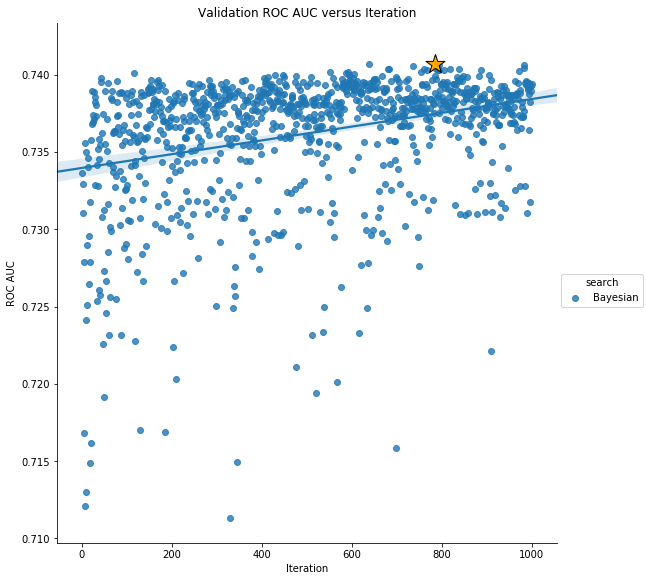

In [ ]:
# Dataframe thể hiện độ đo
scores = pd.DataFrame({'ROC AUC': bayes_params['score'], 'iteration': bayes_params['iteration'], 'search': 'Bayesian'})

scores['ROC AUC'] = scores['ROC AUC'].astype(np.float32)
scores['iteration'] = scores['iteration'].astype(np.int32)

# Giá trị tốt nhất
best_bayes_params = bayes_params.iloc[bayes_params['score'].idxmax(), :].copy()

# Vẽ biểu đồ giá trị ROC AUC của mỗi lần lặp
sns.lmplot('iteration', 'ROC AUC', hue = 'search', data = scores, size = 8);
plt.scatter(best_bayes_params['iteration'], best_bayes_params['score'], marker = '*', s = 400, c = 'orange', edgecolor = 'k')
plt.xlabel('Iteration'); plt.ylabel('ROC AUC'); plt.title("Validation ROC AUC versus Iteration");

## Áp dụng trên toàn bộ tập dữ liệu

Sử dụng các siêu tham số tốt nhất được tìm ra từ random search để áp dụng cho toàn bộ tập dữ liệu sau khi đã tiền xử lý của nhóm.

Tổng hợp các dataset đã xử lý của nhóm: "[Home Credit Team8 Dataset](https://www.kaggle.com/chnhgr/home-credit-team8-dataset)"

In [ ]:
# Đọc dữ liệu
train = pd.read_csv('../input/home-credit-team8-dataset/final_train_2.csv')
test = pd.read_csv('../input/home-credit-team8-dataset/final_test_2.csv')

# Tách cột ID và Target
test_ids = test['SK_ID_CURR']
train_labels = np.array(train['TARGET'].astype(np.int32)).reshape((-1, ))

train = train.drop(columns = ['SK_ID_CURR', 'TARGET'])
test = test.drop(columns = ['SK_ID_CURR'])

print('Training shape: ', train.shape)
print('Testing shape: ', test.shape)

Training shape:  (307511, 429)
Testing shape:  (48744, 429)


In [ ]:
bayes_results['hyperparameters'] = bayes_results['hyperparameters'].map(ast.literal_eval)
train_set = lgb.Dataset(train, label = train_labels)
hyperparameters = dict(**bayes_results.loc[0, 'hyperparameters'])
del hyperparameters['n_estimators']

# Thực thi Cross validation
cv_results = lgb.cv(hyperparameters, train_set,
                    num_boost_round = 10000, early_stopping_rounds = 100, 
                    metrics = 'auc', nfold = N_FOLDS)

print('The cross validation score on the full dataset for Bayesian optimization = {:.5f} with std: {:.5f}.'.format(
    cv_results['auc-mean'][-1], cv_results['auc-stdv'][-1]))
print('Number of estimators = {}.'.format(len(cv_results['auc-mean'])))

The cross validation score on the full dataset for Bayesian optimization = 0.78729 with std: 0.00287.
Number of estimators = 2131.


In [ ]:
# Dự đoán kết quả trên tập test
model = lgb.LGBMClassifier(n_estimators = len(cv_results['auc-mean']), **hyperparameters)
model.fit(train, train_labels)

preds = model.predict_proba(test)[:, 1]

submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': preds})
submission.to_csv('submission_bayesian_optimization.csv', index = False)

## Kết quả

**Kết quả của tác giả là:**
- Thời gian thực thi trên Kaggle: __3750.5s__.
- Public Leaderboard: __0.791__.

**Kết quả của Solution Top1 là:**
- Public Leaderboard: __0.80920__.
- Private Leaderboard: __0.80570__.

**Kết quả của nhóm là:**

|                            	| <font size="3"> Dataset 1 	| <font size="3"> Dataset 2 	| <font size="3"> Dataset 3 	|
|:--------------------------:	|:---------:	|:---------:	|:---------:	|
| <font size="3"> Thời gian chạy trên Kaggle 	|  <font size="3"> 2531.2s  	|  <font size="3"> 2395.9s 	|  <font size="3"> 4079.8s 	|
|     <font size="3"> Private Leaderboard    	|  <font size="3"> 0.78873  	|  <font size="3"> 0.79011 	|  <font size="3"> 0.79073  	|
|     <font size="3"> Public Leaderboard     	|  <font size="3"> 0.79491  	|  <font size="3"> 0.79573  	|  <font size="3"> 0.79456  	|


## Một số cải tiến nhưng không thành công

Tác giả sử dụng việc điều chỉnh siêu tham dựa vào việc tìm kiếm trên file `application_train` của đề bài. Nhóm nhận thấy là nếu sử dụng tìm kiếm trên file data train sau khi tiền xử lý thì có thể cho ra kết quả tốt hơn. Tuy nhiên kích thước file data train quá lớn, thực hiện tìm kiếm trên đó bị quá thời gian của Kaggle (9 tiếng).

Cụ thể nhóm thực hiện tìm kiếm lần lượt với các cách chia: 20000 train - 10000 test, 15000 - 10000, 10000 - 6000, 10000 - 5000 với cả 3 dataset tuy nhiên đều bị quá 9 tiếng (nhóm cũng đã thử trên cả GPU).

Khi hạ số lượng xuống dưới mức 10000 train - 6000 test thì thực hiện được, nhưng kết quả khi submit lại thấp hơn nhiều (cao nhất là 0.787 với private và 0.79 với public) nên nhóm không lựa chọn cách này nữa. Bởi vì tốn rất nhiều thời gian chạy và không có hiệu quả cao.

Nhóm cũng có thực hiện tìm kiếm trên file `application_train` với các cách chia lớn hơn 100000 train - 50000 test, 50000 - 30000 nhưng cũng vượt quá giới hạn của kaggle.
